<a href="https://colab.research.google.com/github/ibrahimr/Udacity_HW/blob/master/investigate_a_dataset_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project: Investigate  

1.   U.S. Census Data
2.   gun_data



## Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

load lib, tead fels abg get the gist

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gun_data.xlsx to gun_data.xlsx
Saving U.S. Census Data.csv to U.S. Census Data.csv


In [ ]:
dfus = pd.read_csv('U.S. Census Data.csv')
dfgun = pd.read_excel ('gun_data.xlsx')

In [ ]:
dfus.head(2)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680","1,360,301","1,567,650","12,831,574","6,484,136","3,046,869","2,853,129","4,339,344","4,533,479","1,328,364","5,773,786","6,547,813","9,884,129","5,303,924","2,968,103","5,988,928","989,414","1,826,334","2,700,691","1,316,461","8,791,953",2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


In [ ]:
dfgun.head(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,1378.0,1262.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,200.0,154.0,2.0,28.0,30.0,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303


In [ ]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

>   check for cleanliness, and then trim and clean  dataset for analysis.  

### General Properties

 

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

### **Handling Missing Data**

Data Transformation needed first to hsndle nans

In [ ]:
 dfus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [ ]:
for i in range(2,52):
  dfus.iloc[ :,i ]= dfus.iloc[ :,i ].astype(str)
  print(i)
  dfus.iloc[ :,i ]=dfus.iloc[ :,i ].str.replace('$' ,'' )
  dfus.iloc[ :,i ]=dfus.iloc[ :,i ].str.replace(',' ,'' )
  print(     dfus[ dfus.iloc[ :,i ].str.contains('%') ].shape[0]      )


2
29
3
29
4
29
5
29
6
29
7
29
8
29
9
29
10
29
11
29
12
29
13
29
14
29
15
29
16
29
17
29
18
29
19
29
20
28
21
29
22
29
23
28
24
29
25
29
26
29
27
29
28
29
29
29
30
29
31
29
32
0
33
0
34
0
35
0
36
0
37
0
38
0
39
0
40
0
41
0
42
0
43
0
44
29
45
29
46
28
47
29
48
29
49
28
50
29
51
28


# 30 out pf 85 rows have the '%' and enterd as pwercent not number , will delete them all 

In [ ]:
# convert to string dtyoe 
dfus=dfus.convert_dtypes(str)
dfus.dtypes
 

Fact              string
Fact Note         string
Alabama           string
Alaska            string
Arizona           string
Arkansas          string
California        string
Colorado          string
Connecticut       string
Delaware          string
Florida           string
Georgia           string
Hawaii            string
Idaho             string
Illinois          string
Indiana           string
Iowa              string
Kansas            string
Kentucky          string
Louisiana         string
Maine             string
Maryland          string
Massachusetts     string
Michigan          string
Minnesota         string
Mississippi       string
Missouri          string
Montana           string
Nebraska          string
Nevada            string
New Hampshire     string
New Jersey        string
New Mexico        string
New York          string
North Carolina    string
North Dakota      string
Ohio              string
Oklahoma          string
Oregon            string
Pennsylvania      string


In [ ]:
#dfus[dfus.iloc[:,2:52 ].str.contains('%')  ]  
dfus['Fact']=dfus['Fact'].str.replace('\%', '')
dfus['Fact Note']=dfus['Fact Note'].str.replace('\%', '')
for i in range(3,52):
  myindex=dfus[ dfus.iloc[ :,i ].str.contains('%') ].index 
# to drop
myindex
dfus.drop(index=myindex, inplace=True)

In [ ]:
#check 
for i in range(2,52):
  myindex=    dfus[ dfus.iloc[ :,i ].str.contains('%') ].index 
# to drop
myindex


Int64Index([], dtype='int64')

In [ ]:
dfus.shape

(57, 52)

In [ ]:
dfus[dfus.notna() ]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",<NA>,4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,20612439,10310371,1428557,1683140,12801539,6633053,3134693,2907289,4436974,4681666,1331479,6016447,6811779,9928300,5519952,2988726,6093000,1042520,1907116,2940058,1334795,8944469,2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,"Population estimates base, April 1, 2010, (V2...",<NA>,4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,18804592,9688680,1360301,1567650,12831574,6484136,3046869,2853129,4339344,4533479,1328364,5773786,6547813,9884129,5303924,2968103,5988928,989414,1826334,2700691,1316461,8791953,2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767
3,"Population, Census, April 1, 2010",<NA>,4779736,710231,6392017,2915918,37253956,5029196,3574097,897934,18801310,9687653,1360301,1567582,12830632,6483802,3046355,2853118,4339367,4533372,1328361,5773552,6547629,9883640,5303925,2967297,5988927,989415,1826341,2700551,1316470,8791894,2059179,19378102,9535483,672591,11536504,3751351,3831074,12702379,1052567,4625364,814180,6346105,25145561,2763885,625741,8001024,6724540,1852994,5686986,563626
20,"Veterans, 2011-2015",<NA>,363170,69323,505794,220953,1777410,391725,199331,71213,1507738,670617,110238,119711,668933,426493,211066,198396,297312,281989,119058,403900,355083,626722,342388,184774,451342,90000,132918,220332,106827,393277,164157,828586,696119,51179,806531,295847,306723,870770,66076,378959,63742,462414,1539655,134332,44708,706539,564864,150021,381940,48505
22,"Housing units, July 1, 2016, (V2016)",<NA>,2230185,310658,2961003,1354762,14060525,2339118,1499116,426149,9301642,4218776,537114,700825,5326970,2854546,1380162,1259864,1965556,2036975,730705,2447127,2858026,4560055,2409935,1307441,2760084,497756,827156,1221698,625307,3604409,917568,8231687,4540498,368624,5164361,1721045,1732786,5612002,462589,2236153,383838,2919671,10753629,1054164,329525,3491054,3025685,886640,2668444,270600
23,"Housing units, April 1, 2010",<NA>,2171853,306967,2844526,1316299,13680081,2212898,1487891,405885,8989580,4088801,519508,667796,5296715,2795541,1336417,1233215,1927164,1964981,721830,2378814,2808254,4532233,2347201,1274719,2712729,482825,796793,1173814,614754,3553562,901388,8108103,4327528,317498,5127508,1664378,1675562,5567315,463388,2137683,363438,2812133,9977436,979709,322539,3364939,2885677,881917,2624358,261868
25,"Median value of owner-occupied housing units, ...",<NA>,125500,250000,167500,111400,385500,247800,270500,231500,159000,148100,515300,162900,173800,124200,129200,132000,123200,144100,173800,286900,333100,122400,186200,103100,138400,193500,133200,173700,237300,315900,160300,283400,154900,153800,129900,117900,237300,166000,238000,139900,140500,142100,136000,215900,217500,245000,259500,103800,165800,194800
26,Median selected monthly owner costs -with a mo...,<NA>,1139,1827,1343,1019,2155,1577,2067,1537,1435,1346,2270,1189,1636,1102,1171,1282,1112,1200,1336,1951,2063,1257,1490,1077,1210,1294,1270,1442,1870,2386,1227,2022,1248,1243,1246,1147,1557,1425,1815,1183,1210,1181,1432,1428,1535,1711,1731,966,1402,1348
27,Median selected monthly owner costs -without a...,<NA>,345,554,380,327,500,419,833,445,463,392,505,340,574,378,434,455,339,317,477,582,717,461,479,341,402,387,471,410,747,973,327,709,373,423,444,370,469

Convert numberd to float  dfus[2:52] 

In [ ]:
 for i in range(2,52):
  dfus.iloc[ :,i ]=pd.to_numeric(dfus.iloc[ :,i ], downcast="float", errors='coerce')

  
 #  dfus.iloc[ :,i ]=dfus.iloc[ :,i ].str.extract( '(\d*\.\d+|\d+)',   expand=False).astype(float)

dfus.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fact            52 non-null     string 
 1   Fact Note       22 non-null     string 
 2   Alabama         35 non-null     float32
 3   Alaska          34 non-null     float32
 4   Arizona         35 non-null     float32
 5   Arkansas        35 non-null     float32
 6   California      35 non-null     float32
 7   Colorado        35 non-null     float32
 8   Connecticut     35 non-null     float32
 9   Delaware        35 non-null     float32
 10  Florida         35 non-null     float32
 11  Georgia         35 non-null     float32
 12  Hawaii          34 non-null     float32
 13  Idaho           35 non-null     float32
 14  Illinois        35 non-null     float32
 15  Indiana         35 non-null     float32
 16  Iowa            35 non-null     float32
 17  Kansas          35 non-null     float

In [ ]:
dfus.fillna(dfus.mean(axis=0), inplace=True)

In [ ]:
dfus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fact            52 non-null     string 
 1   Fact Note       22 non-null     string 
 2   Alabama         57 non-null     float32
 3   Alaska          57 non-null     float32
 4   Arizona         57 non-null     float32
 5   Arkansas        57 non-null     float32
 6   California      57 non-null     float32
 7   Colorado        57 non-null     float32
 8   Connecticut     57 non-null     float32
 9   Delaware        57 non-null     float32
 10  Florida         57 non-null     float32
 11  Georgia         57 non-null     float32
 12  Hawaii          57 non-null     float32
 13  Idaho           57 non-null     float32
 14  Illinois        57 non-null     float32
 15  Indiana         57 non-null     float32
 16  Iowa            57 non-null     float32
 17  Kansas          57 non-null     float

In [ ]:
dfus
 


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",<NA>,4.863300e+06,7.418940e+05,6.931071e+06,2.988248e+06,3.925002e+07,5.540545e+06,3.576452e+06,9.520650e+05,2.061244e+07,1.031037e+07,1.428557e+06,1.683140e+06,1.280154e+07,6.633053e+06,3.134693e+06,2.907289e+06,4.436974e+06,4.681666e+06,1.331479e+06,6.016447e+06,6.811779e+06,9.928300e+06,5.519952e+06,2.988726e+06,6.093000e+06,1.042520e+06,1.907116e+06,2.940058e+06,1.334795e+06,8.944469e+06,2.081015e+06,1.974529e+07,1.014679e+07,7.579520e+05,1.161437e+07,3.923561e+06,4.093465e+06,1.278423e+07,1.056426e+06,4.961119e+06,8.654540e+05,6.651194e+06,2.786260e+07,3.051217e+06,6.245940e+05,8.411808e+06,7.288000e+06,1.831102e+06,5.778708e+06,5.855010e+05
1,"Population estimates base, April 1, 2010, (V2...",<NA>,4.780131e+06,7.102490e+05,6.392301e+06,2.916025e+06,3.725452e+07,5.029324e+06,3.574114e+06,8.979360e+05,1.880459e+07,9.688680e+06,1.360301e+06,1.567650e+06,1.283157e+07,6.484136e+06,3.046869e+06,2.853129e+06,4.339344e+06,4.533479e+06,1.328364e+06,5.773786e+06,6.547813e+06,9.884129e+06,5.303924e+06,2.968103e+06,5.988928e+06,9.894140e+05,1.826334e+06,2.700691e+06,1.316461e+06,8.791953e+06,2.059198e+06,1.937811e+07,9.535688e+06,6.725910e+05,1.153673e+07,3.751615e+06,3.831072e+06,1.270286e+07,1.052940e+06,4.625410e+06,8.141950e+05,6.346298e+06,2.514610e+07,2.763888e+06,6.257410e+05,8.001041e+06,6.724545e+06,1.853011e+06,5.687289e+06,5.637670e+05
3,"Population, Census, April 1, 2010",<NA>,4.779736e+06,7.102310e+05,6.392017e+06,2.915918e+06,3.725396e+07,5.029196e+06,3.574097e+06,8.979340e+05,1.880131e+07,9.687653e+06,1.360301e+06,1.567582e+06,1.283063e+07,6.483802e+06,3.046355e+06,2.853118e+06,4.339367e+06,4.533372e+06,1.328361e+06,5.773552e+06,6.547629e+06,9.883640e+06,5.303925e+06,2.967297e+06,5.988927e+06,9.894150e+05,1.826341e+06,2.700551e+06,1.316470e+06,8.791894e+06,2.059179e+06,1.937810e+07,9.535483e+06,6.725910e+05,1.153650e+07,3.751351e+06,3.831074e+06,1.270238e+07,1.052567e+06,4.625364e+06,8.141800e+05,6.346105e+06,2.514556e+07,2.763885e+06,6.257410e+05,8.001024e+06,6.724540e+06,1.852994e+06,5.686986e+06,5.636260e+05
20,"Veterans, 2011-2015",<NA>,3.631700e+05,6.932300e+04,5.057940e+05,2.209530e+05,1.777410e+06,3.917250e+05,1.993310e+05,7.121300e+04,1.507738e+06,6.706170e+05,1.102380e+05,1.197110e+05,6.689330e+05,4.264930e+05,2.110660e+05,1.983960e+05,2.973120e+05,2.819890e+05,1.190580e+05,4.039000e+05,3.550830e+05,6.267220e+05,3.423880e+05,1.847740e+05,4.513420e+05,9.000000e+04,1.329180e+05,2.203320e+05,1.068270e+05,3.932770e+05,1.641570e+05,8.285860e+05,6.961190e+05,5.117900e+04,8.065310e+05,2.958470e+05,3.067230e+05,8.707700e+05,6.607600e+04,3.789590e+05,6.374200e+04,4.624140e+05,1.539655e+06,1.343320e+05,4.470800e+04,7.065390e+05,5.648640e+05,1.500210e+05,3.819400e+05,4.850500e+04
22,"Housing units, July 1, 2016, (V2016)",<NA>,2.230185e+06,3.106580e+05,2.961003e+06,1.354762e+06,1.406052e+07,2.339118e+06,1.499116e+06,4.261490e+05,9.301642e+06,4.218776e+06,5.371140e+05,7.008250e+05,5.326970e+06,2.854546e+06,1.380162e+06,1.259864e+06,1.965556e+06,2.036975e+06,7.307050e+05,2.447127e+06,2.858026e+06,4.560055e+06,2.409935e+06,1.307441e+06,2.760084e+06,4.977560e+05,8.271560e+05,1.221698e+06,6.253070e+05,3.604409e+06,9.175680e+05,8.231687e+06,4.540498e+06,3.686240e+05,5.164361e+06,1.721045e+06,1.732786e+06,5.612002e+06,4.625890e+05,2.236153e+06,3.838380e+05,2.919671e+06,1.075363e+07,1.054164e+06,3.295250e+05,3.491054e+06,3.025685e+06,8.866400e+05,2.668444e+06,2.706000e+05
23,"Housing units, April 1, 201

### `second file manipulate, nssing and dtypes too` + duplicates

In [ ]:
dfgun.head(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,1378.0,1262.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,200.0,154.0,2.0,28.0,30.0,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303


In [ ]:
dfgun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [ ]:
dfgun.shape

(12485, 27)

In [ ]:
dfgun.drop_duplicates()
dfgun.shape

(12485, 27)

**NO  duplicates**

In [ ]:
dfgun.fillna(dfgun.mean(axis=0), inplace=True)

In [ ]:
dfgun

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.000000,5734.0,6320.0,221.000000,317,0.0,15.000000,21.000000,2.000000,1378.000000,1262.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000,16.000000,3.000000,0.00000,0.000000,3.000000,32019
1,2017-09,Alaska,209.0,2.000000,2320.0,2930.0,219.000000,160,0.0,5.000000,2.000000,0.000000,200.000000,154.000000,2.000000,28.000000,30.000000,0.000000,0.000000,0.000000,17.000,24.000000,1.000000,0.00000,0.000000,0.000000,6303
2,2017-09,Arizona,5069.0,382.000000,11063.0,7946.0,920.000000,631,0.0,13.000000,6.000000,0.000000,1474.000000,748.000000,3.000000,82.000000,5.000000,0.000000,0.000000,0.000000,38.000,12.000000,2.000000,0.00000,0.000000,0.000000,28394
3,2017-09,Arkansas,2935.0,632.000000,4347.0,6063.0,165.000000,366,51.0,12.000000,13.000000,0.000000,1296.000000,1824.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000,23.000000,0.000000,0.00000,2.000000,1.000000,17747
4,2017-09,California,57839.0,0.000000,37165.0,24581.0,2984.000000,0,0.0,0.000000,0.000000,0.000000,535.000000,397.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,123506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11,Virginia,0.0,1165.956364,14.0,2.0,360.471636,8,0.0,4.828021,7.834156,0.165591,407.970413,599.332417,1.815249,29.612727,7.557576,1.027548,0.076768,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,24
12481,1998-11,Washington,1.0,1165.956364,65.0,286.0,360.471636,8,1.0,4.828021,7.834156,0.165591,407.970413,599.332417,1.815249,29.612727,7.557576,1.027548,0.076768,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,361
12482,1998-11,West Virginia,3.0,1165.956364,149.0,251.0,360.471636,5,0.0,4.828021,7.834156,0.165591,407.970413,599.332417,1.815249,29.612727,7.557576,1.027548,0.076768,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,408
12483,1998-11,Wisconsin,0.0,1165.956364,25.0,214.0,360.471636,2,0.0,4.828021,7.834156,0.165591,407.970413,599.332417,1.815249,29.612727,7.557576,1.027548,0.076768,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,241


In [ ]:
  dfgun['month']= pd.to_datetime(dfgun['month'], infer_datetime_format=True)

bold text# added  day - ro the date wont usws in analysus

In [ ]:
type(dfgun)

pandas.core.frame.DataFrame

# change state type

In [ ]:
dfgun['state'] = dfgun['state'].astype(str) 

# NO NEED foe this conversion discovered latter

In [ ]:
dfgun.dtypes

month                        datetime64[ns]
state                                object
permit                              float64
permit_recheck                      float64
handgun                             float64
long_gun                            float64
other                               float64
multiple                              int64
admin                               float64
prepawn_handgun                     float64
prepawn_long_gun                    float64
prepawn_other                       float64
redemption_handgun                  float64
redemption_long_gun                 float64
redemption_other                    float64
returned_handgun                    float64
returned_long_gun                   float64
returned_other                      float64
rentals_handgun                     float64
rentals_long_gun                    float64
private_sale_handgun                float64
private_sale_long_gun               float64
private_sale_other              

In [ ]:
dfus

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",<NA>,4.863300e+06,7.418940e+05,6.931071e+06,2.988248e+06,3.925002e+07,5.540545e+06,3.576452e+06,9.520650e+05,2.061244e+07,1.031037e+07,1.428557e+06,1.683140e+06,1.280154e+07,6.633053e+06,3.134693e+06,2.907289e+06,4.436974e+06,4.681666e+06,1.331479e+06,6.016447e+06,6.811779e+06,9.928300e+06,5.519952e+06,2.988726e+06,6.093000e+06,1.042520e+06,1.907116e+06,2.940058e+06,1.334795e+06,8.944469e+06,2.081015e+06,1.974529e+07,1.014679e+07,7.579520e+05,1.161437e+07,3.923561e+06,4.093465e+06,1.278423e+07,1.056426e+06,4.961119e+06,8.654540e+05,6.651194e+06,2.786260e+07,3.051217e+06,6.245940e+05,8.411808e+06,7.288000e+06,1.831102e+06,5.778708e+06,5.855010e+05
1,"Population estimates base, April 1, 2010, (V2...",<NA>,4.780131e+06,7.102490e+05,6.392301e+06,2.916025e+06,3.725452e+07,5.029324e+06,3.574114e+06,8.979360e+05,1.880459e+07,9.688680e+06,1.360301e+06,1.567650e+06,1.283157e+07,6.484136e+06,3.046869e+06,2.853129e+06,4.339344e+06,4.533479e+06,1.328364e+06,5.773786e+06,6.547813e+06,9.884129e+06,5.303924e+06,2.968103e+06,5.988928e+06,9.894140e+05,1.826334e+06,2.700691e+06,1.316461e+06,8.791953e+06,2.059198e+06,1.937811e+07,9.535688e+06,6.725910e+05,1.153673e+07,3.751615e+06,3.831072e+06,1.270286e+07,1.052940e+06,4.625410e+06,8.141950e+05,6.346298e+06,2.514610e+07,2.763888e+06,6.257410e+05,8.001041e+06,6.724545e+06,1.853011e+06,5.687289e+06,5.637670e+05
3,"Population, Census, April 1, 2010",<NA>,4.779736e+06,7.102310e+05,6.392017e+06,2.915918e+06,3.725396e+07,5.029196e+06,3.574097e+06,8.979340e+05,1.880131e+07,9.687653e+06,1.360301e+06,1.567582e+06,1.283063e+07,6.483802e+06,3.046355e+06,2.853118e+06,4.339367e+06,4.533372e+06,1.328361e+06,5.773552e+06,6.547629e+06,9.883640e+06,5.303925e+06,2.967297e+06,5.988927e+06,9.894150e+05,1.826341e+06,2.700551e+06,1.316470e+06,8.791894e+06,2.059179e+06,1.937810e+07,9.535483e+06,6.725910e+05,1.153650e+07,3.751351e+06,3.831074e+06,1.270238e+07,1.052567e+06,4.625364e+06,8.141800e+05,6.346105e+06,2.514556e+07,2.763885e+06,6.257410e+05,8.001024e+06,6.724540e+06,1.852994e+06,5.686986e+06,5.636260e+05
20,"Veterans, 2011-2015",<NA>,3.631700e+05,6.932300e+04,5.057940e+05,2.209530e+05,1.777410e+06,3.917250e+05,1.993310e+05,7.121300e+04,1.507738e+06,6.706170e+05,1.102380e+05,1.197110e+05,6.689330e+05,4.264930e+05,2.110660e+05,1.983960e+05,2.973120e+05,2.819890e+05,1.190580e+05,4.039000e+05,3.550830e+05,6.267220e+05,3.423880e+05,1.847740e+05,4.513420e+05,9.000000e+04,1.329180e+05,2.203320e+05,1.068270e+05,3.932770e+05,1.641570e+05,8.285860e+05,6.961190e+05,5.117900e+04,8.065310e+05,2.958470e+05,3.067230e+05,8.707700e+05,6.607600e+04,3.789590e+05,6.374200e+04,4.624140e+05,1.539655e+06,1.343320e+05,4.470800e+04,7.065390e+05,5.648640e+05,1.500210e+05,3.819400e+05,4.850500e+04
22,"Housing units, July 1, 2016, (V2016)",<NA>,2.230185e+06,3.106580e+05,2.961003e+06,1.354762e+06,1.406052e+07,2.339118e+06,1.499116e+06,4.261490e+05,9.301642e+06,4.218776e+06,5.371140e+05,7.008250e+05,5.326970e+06,2.854546e+06,1.380162e+06,1.259864e+06,1.965556e+06,2.036975e+06,7.307050e+05,2.447127e+06,2.858026e+06,4.560055e+06,2.409935e+06,1.307441e+06,2.760084e+06,4.977560e+05,8.271560e+05,1.221698e+06,6.253070e+05,3.604409e+06,9.175680e+05,8.231687e+06,4.540498e+06,3.686240e+05,5.164361e+06,1.721045e+06,1.732786e+06,5.612002e+06,4.625890e+05,2.236153e+06,3.838380e+05,2.919671e+06,1.075363e+07,1.054164e+06,3.295250e+05,3.491054e+06,3.025685e+06,8.866400e+05,2.668444e+06,2.706000e+05
23,"Housing units, April 1, 201

In [ ]:
dfgun

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.000000,5734.0,6320.0,221.000000,317,0.0,15.000000,21.000000,2.000000,1378.000000,1262.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000,16.000000,3.000000,0.00000,0.000000,3.000000,32019
1,2017-09-01,Alaska,209.0,2.000000,2320.0,2930.0,219.000000,160,0.0,5.000000,2.000000,0.000000,200.000000,154.000000,2.000000,28.000000,30.000000,0.000000,0.000000,0.000000,17.000,24.000000,1.000000,0.00000,0.000000,0.000000,6303
2,2017-09-01,Arizona,5069.0,382.000000,11063.0,7946.0,920.000000,631,0.0,13.000000,6.000000,0.000000,1474.000000,748.000000,3.000000,82.000000,5.000000,0.000000,0.000000,0.000000,38.000,12.000000,2.000000,0.00000,0.000000,0.000000,28394
3,2017-09-01,Arkansas,2935.0,632.000000,4347.0,6063.0,165.000000,366,51.0,12.000000,13.000000,0.000000,1296.000000,1824.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000,23.000000,0.000000,0.00000,2.000000,1.000000,17747
4,2017-09-01,California,57839.0,0.000000,37165.0,24581.0,2984.000000,0,0.0,0.000000,0.000000,0.000000,535.000000,397.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,123506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11-01,Virginia,0.0,1165.956364,14.0,2.0,360.471636,8,0.0,4.828021,7.834156,0.165591,407.970413,599.332417,1.815249,29.612727,7.557576,1.027548,0.076768,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,24
12481,1998-11-01,Washington,1.0,1165.956364,65.0,286.0,360.471636,8,1.0,4.828021,7.834156,0.165591,407.970413,599.332417,1.815249,29.612727,7.557576,1.027548,0.076768,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,361
12482,1998-11-01,West Virginia,3.0,1165.956364,149.0,251.0,360.471636,5,0.0,4.828021,7.834156,0.165591,407.970413,599.332417,1.815249,29.612727,7.557576,1.027548,0.076768,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,408
12483,1998-11-01,Wisconsin,0.0,1165.956364,25.0,214.0,360.471636,2,0.0,4.828021,7.834156,0.165591,407.970413,599.332417,1.815249,29.612727,7.557576,1.027548,0.076768,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,241


<a id='eda'></a>
## Exploratory Data Analysis

>

*   Compute statistics and 

*   create visualizations  
 
*   addressing   questions  
 

### Research Question 1 (max state for every fact)

max state for every fact

In [ ]:
 print (dfus.iloc[ :,2:52 ].idxmax(axis=1)) 

0       California
1       California
3       California
20      California
22      California
23      California
25          Hawaii
26      New Jersey
27      New Jersey
28          Hawaii
29           Texas
30      California
31            Utah
40      California
41      California
42           Texas
43           Texas
44      California
45    North Dakota
46        Maryland
47        Maryland
48     Connecticut
50      California
51      California
52      California
53      California
54      California
55      California
56      California
57      California
58      California
59      California
60      California
61      California
62      New Jersey
63          Alaska
64      California
65      California
66      California
67      California
68      California
69      California
70      California
71      California
72      California
73      California
74      California
75      California
76      California
77      California
78      California
79      California
80      Cali

Text(0.5, 1.0, ' fig1: Max states frequancy in Fact s')

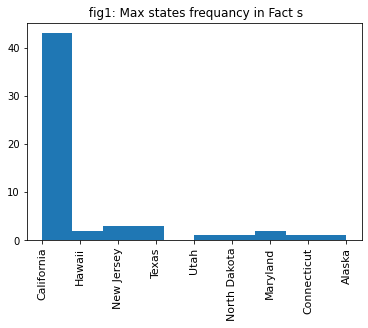

In [ ]:
plt.hist( dfus.iloc[ :,2:52 ].idxmax(axis=1) )
plt.xticks(rotation=90, fontsize=11)
plt.title(' fig1: Max states frequancy in Fact s'  )

Text(0.5, 1.0, ' fig2: sum of states top ten  Fact s')

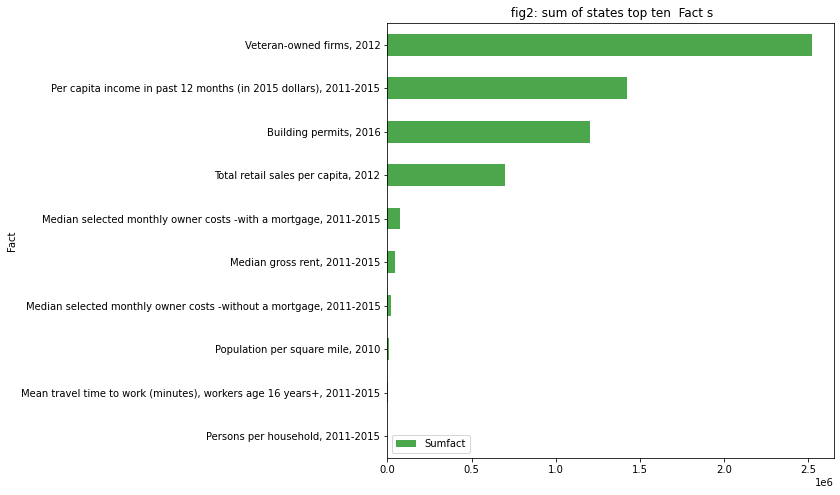

In [ ]:
dfus['Sumfact'] = dfus.iloc[ :,2:52 ].sum(axis=1) 
dfus.sort_values('Sumfact').head(10).plot(kind='barh', x='Fact',y='Sumfact', alpha=.7 , figsize=(8,8), color ='g')
plt.title(' fig2: sum of states top ten  Fact s'  )


 

### Research Question 2  (max state have gun permissons)

 

Text(0.5, 1.0, ' fig3: sum of top 15 permits  top for each state')

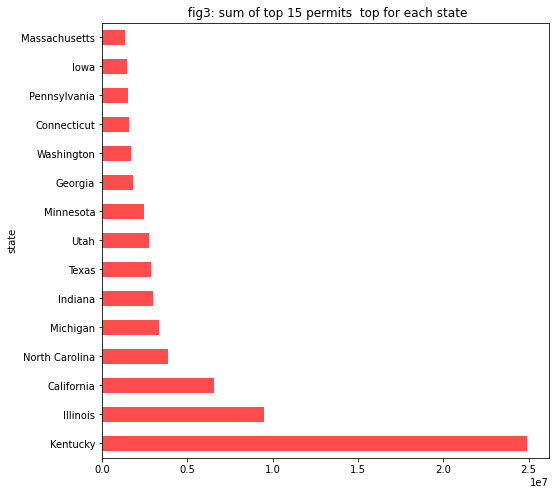

In [ ]:
#dfgun.groupby(['state'] ).sum()
dfgun.groupby('state').permit.sum().sort_values(ascending=False).head(15).plot(kind='barh', x='state' ,alpha=.7 , figsize=(8,8), color ='r')
plt.title(' fig3: sum of top 15 permits  top for each state'  )


 

### Research Question 3 relation vetween features in each state

 

In [ ]:
dfgun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,1378.0,1262.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,200.0,154.0,2.0,28.0,30.0,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,0.0,1474.0,748.0,3.0,82.0,5.0,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,0.0,1296.0,1824.0,4.0,0.0,0.0,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,535.0,397.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff104f1f1d0>,
      dtype=object)

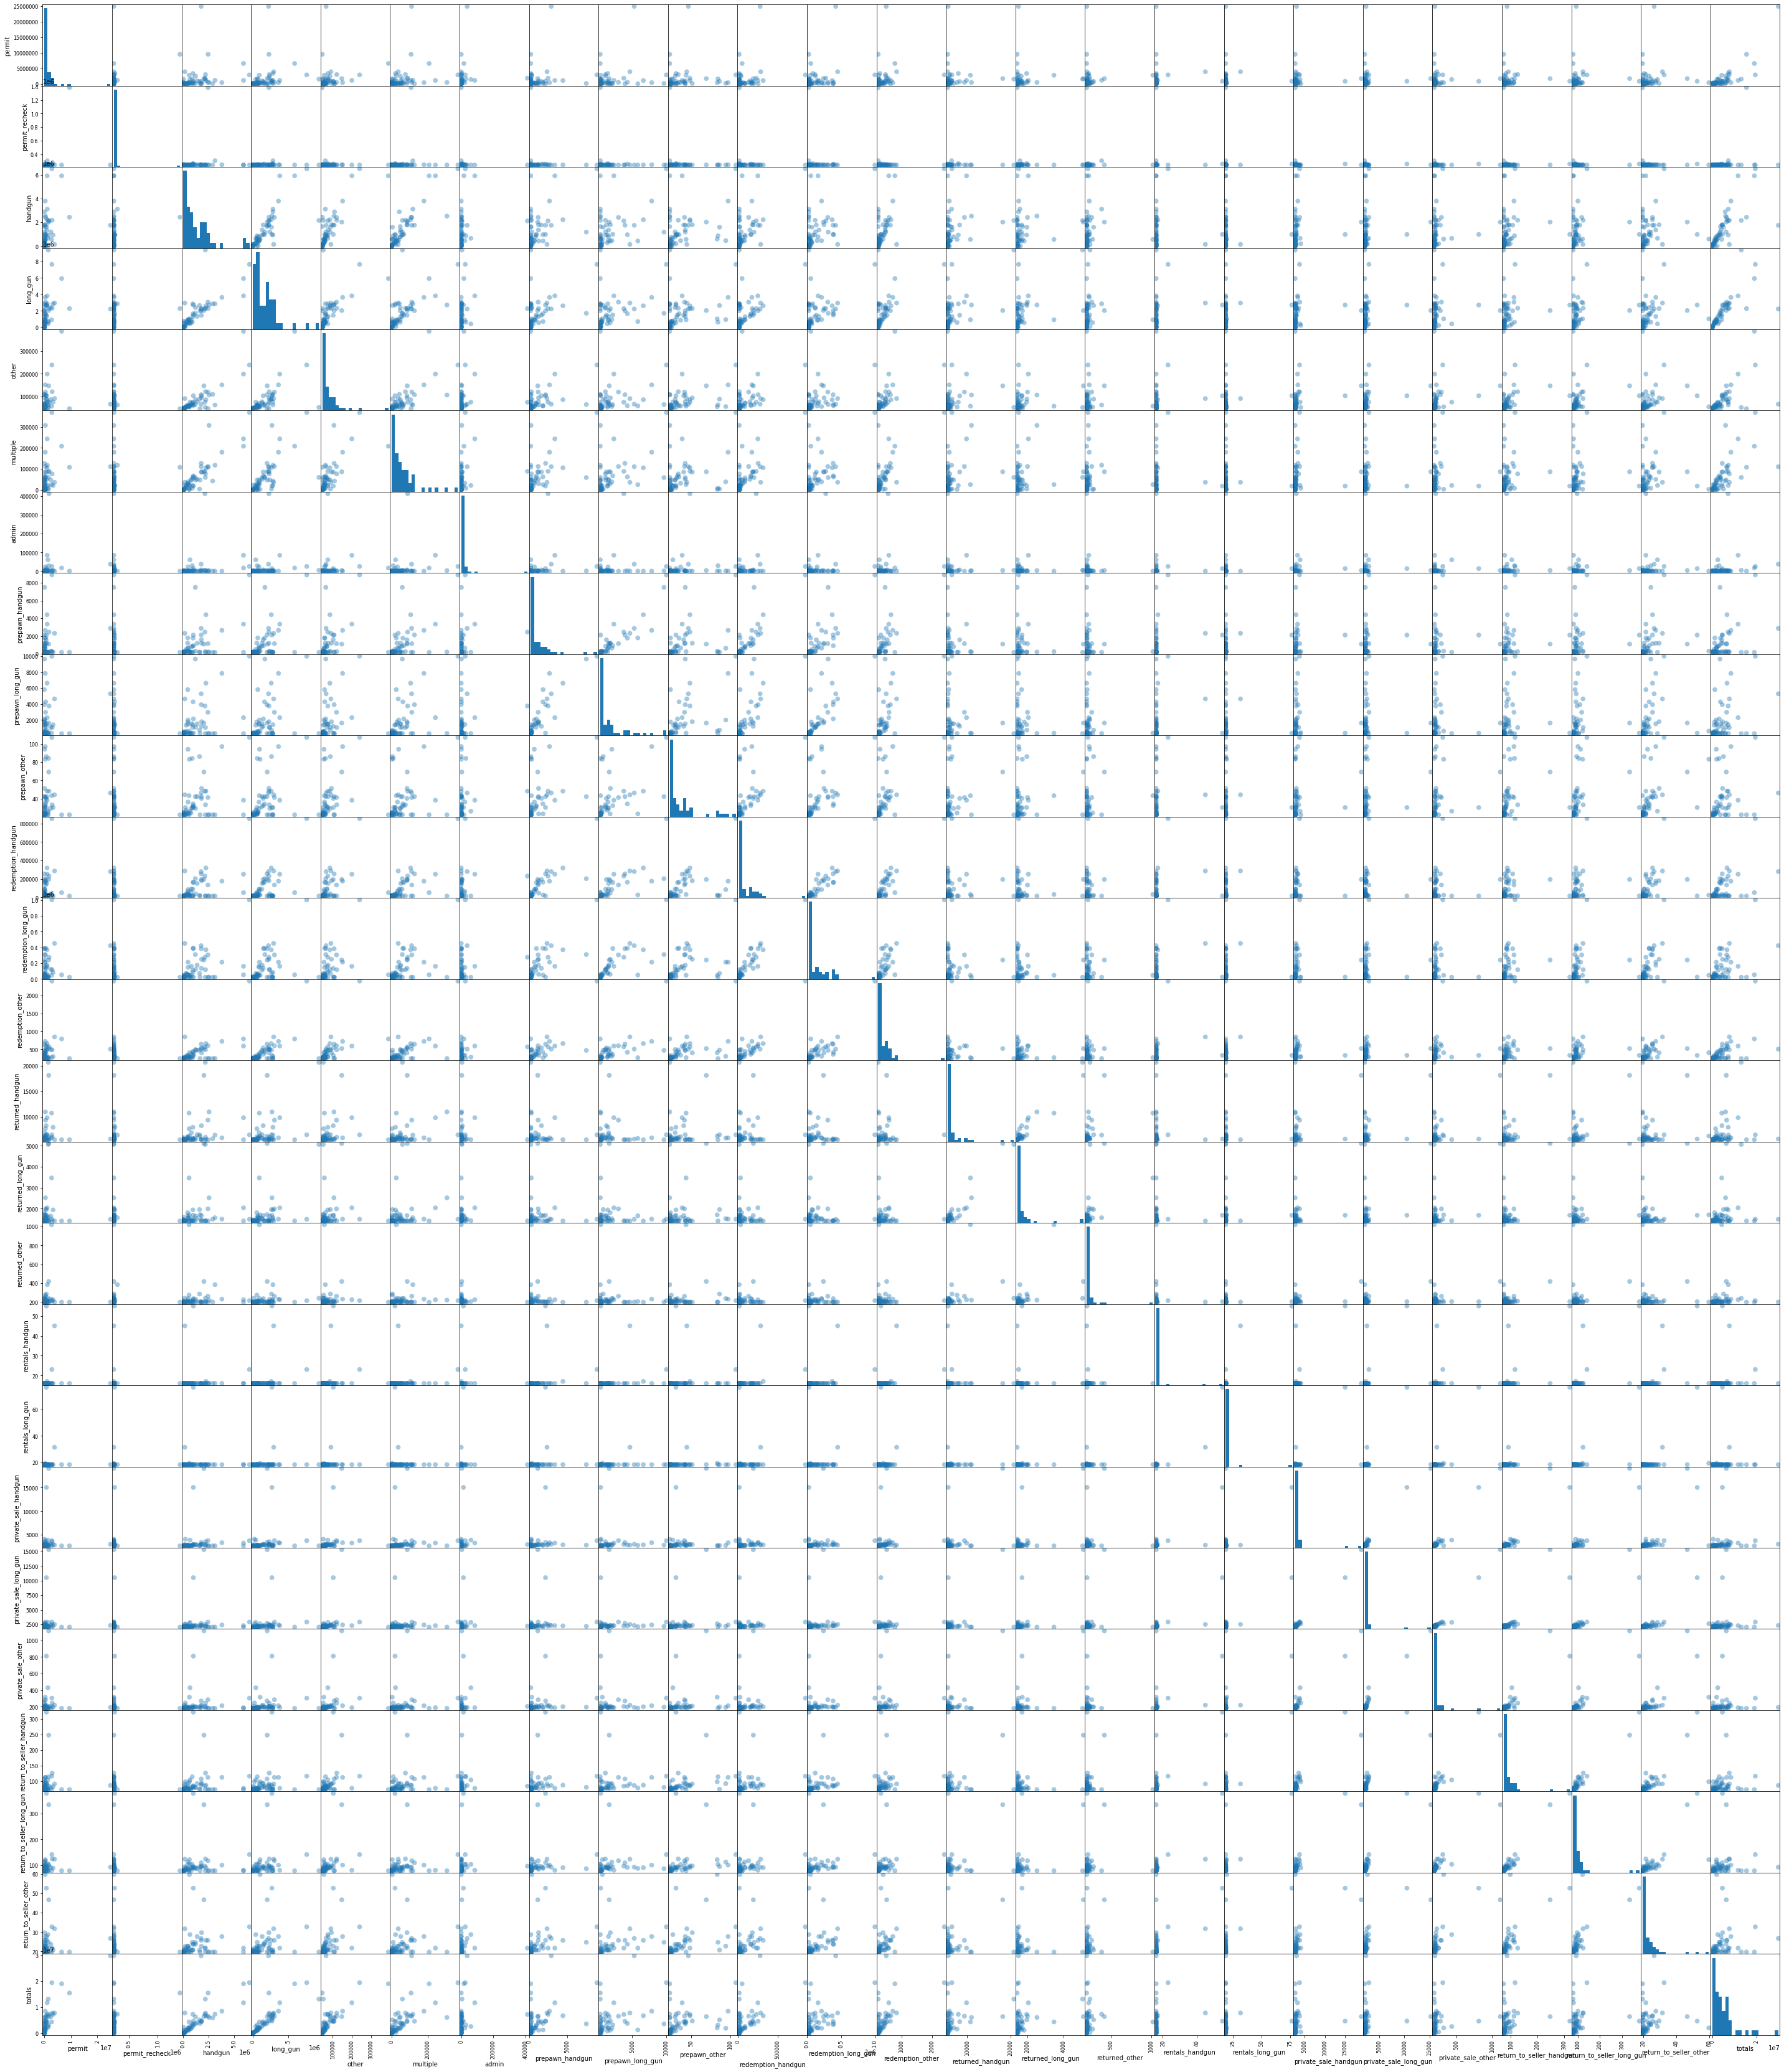

In [ ]:
sumsdf=dfgun.groupby(['state'  ] ).sum() 
pd.plotting.scatter_matrix(sumsdf, figsize=(50, 60), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.4 )



```
# This is formatted as code
```
pre conclusion
 30 out pf 85 rows have the '%' and enterd as pwercent not number , will 




<a id='conclusions'></a>
## Conclusions

 from figure 1. most states in frequanct used guns is Califonia and the least s Alaska.

fig2: sum of states top ten  Fact s' sems that most reason to hod huns are
ownng firms. 
data shows cletly wish states are mostly using guns and for what reasons.
<br>
fig3: sum of top 15 permits  top for each state aperentaly Jentackt hsd the laregest number of permits then illnos.
<br>
fig 4 ahows that from summing view pattern n all states seemes the s ame not dfferm n rule of ncreasing or decreasin or no change patterns.